In [138]:
!pip install matplotlib seaborn wordcloud

**Import libraries**

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**These are the stopwords, so during the preprocessing we will remove all the stopwords from our dataset.**

# **Data Preprocessing**

In [142]:
df = pd.read_csv('/content/train.csv')

In [143]:
df.shape

(20800, 5)

In [144]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


**id:** unique id for a news article

**title:** the title of a news article

**author:** author of the news article

**text:** the text of the article; could be incomplete

**label:** a label that marks the article as potentially unreliable

***---->1: unreliable***

***---->0: reliable***

## **Missing values**

In [145]:
# Counting the number of missing values in each column in the dataset
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

**There are no mising values in the id and label column. But 558 missing values in title column, 1957 missing values in author column, and 39 values in text column.**

Since, we have enough amount of data so we can simply drop the missing values in this dataset. But incase our dataset is very small, so we surely need to use some mising values techniques such as imputaion to fill the mising values with some data instead of just dropping it.

**Replacing Null Values with empty strings**

In [146]:
df = df.fillna('')

**Merging the author name and news title since these are important features in our dataset.**

In [147]:
df['content'] = df['author'] +' '+ df['title']

In [148]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


**So, we will be using this new data (Content) to do the predictions.**

**Separating the data & label**

In [149]:
X = df.drop(columns = 'label', axis = 1)
Y = df['label']

In [150]:
X.head()

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy Iranian woman jailed for fictio...


In [151]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

# **Visualization**

## **Class Distribution**

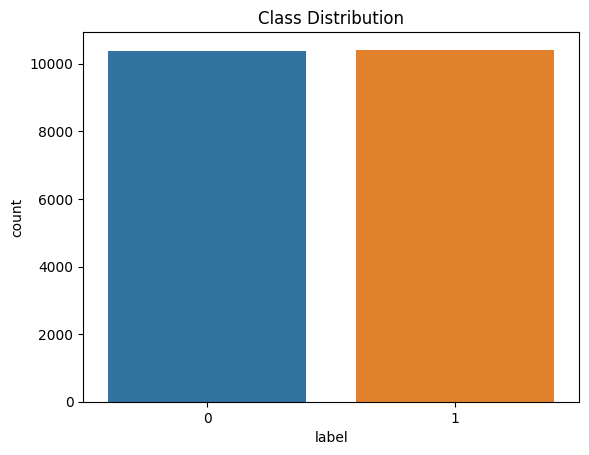

In [152]:
sns.countplot(x ='label', data = df)
plt.title('Class Distribution')
plt.show()

## **Word Cloud for Real News**

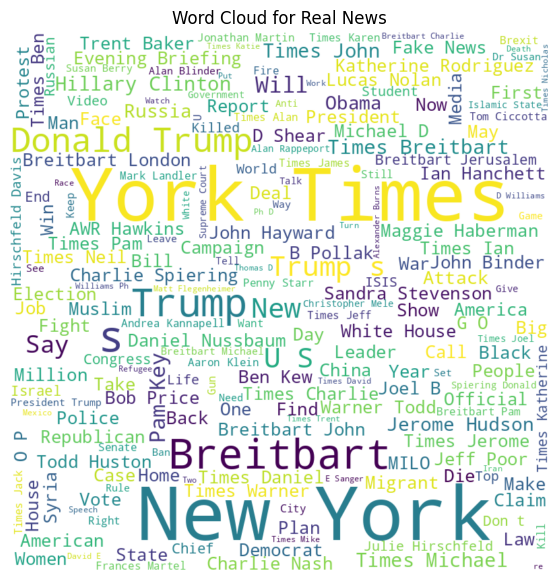

In [153]:
real_wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110, background_color='white').generate(' '.join(df[df['label'] == 0]['content']))
plt.figure(figsize=(10, 7))
plt.imshow(real_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()

## **Word Cloud for Fake News**

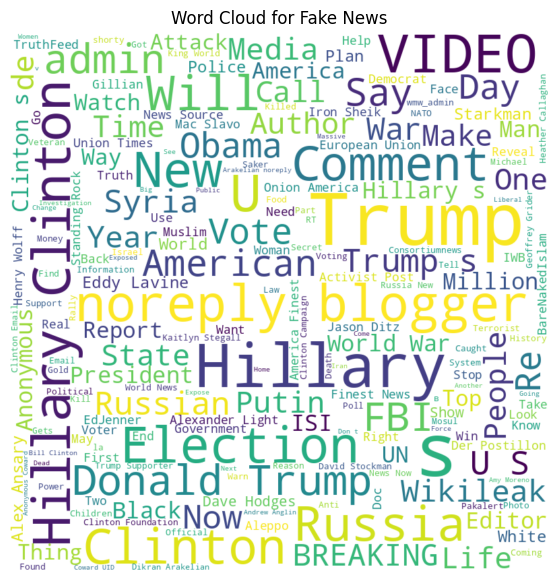

In [154]:
fake_wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110, background_color='white').generate(' '.join(df[df['label'] == 1]['content']))
plt.figure(figsize=(10, 7))
plt.imshow(fake_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()

# **Text Preprocessing**

## **Stemming**

Stemming: Stemming is the process of reducing a word to its root word.

example:

actor, actress, acting --> act

In [155]:
port_stem = PorterStemmer()

In [156]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [157]:
df['content'] = df['content'].apply(stemming)

In [158]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


## **Separating the data and label**

In [159]:
X = df['content'].values
Y = df['label'].values

In [160]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [161]:
print(Y)

[1 0 1 ... 0 1 1]


In [162]:
X.shape

(20800,)

In [163]:
Y.shape

(20800,)

# **TfidfVectorizer**
converting the textual data to numerical data

In [164]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [165]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# **Train and Test Split**

Splitting the dataset to training & test data

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# **Logistic Regression Model**

Training the Logistic Regression Model

In [167]:
model = LogisticRegression()

In [168]:
model.fit(X_train, Y_train)

LogisticRegression()

# **Model Evaluation**

## **Accuracy Score (Train)**

Accuracy score on the training data

In [169]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [170]:
print('Accuracy Score on the training data: ', training_data_accuracy)

Accuracy Score on the training data:  0.9865985576923076


## **Accuracy Score (Test)**

Accuracy score on the test data

In [171]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [172]:
print('Accuracy score on the test data: ', test_data_accuracy)

Accuracy score on the test data:  0.9790865384615385


## **Classification Report**

In [173]:
classification_rep = classification_report(Y_test, X_test_prediction)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



## **Confusion Matrix**

In [174]:
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2004   73]
 [  14 2069]]


## **Precision, Recall, and F1 Score**

In [175]:
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

In [176]:
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))

Precision: 0.97
Recall: 0.99
F1 Score: 0.98


# **Predictive System**

In [177]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [178]:
print(Y_test[3])

0
